# Bước 1: Làm sạch dữ liệu

Import các thư viện cần thiết

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ raw data (nasdaq_stocks.csv) thành DataFrame

In [87]:
data = pd.read_csv('nasdaq_stocks.csv')
df = pd.DataFrame(data)
df

,No.,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue,Volume,Industry,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,1,AAPL,Apple Inc.,"3,273.31B",217.90,-2.66%,395.76B,"39,525,987",Consumer Electronics,Technology,2.61%,96.15B,98.30B,44.57B
1,2,MSFT,Microsoft Corporation,"2,815.99B",378.80,-3.02%,261.80B,"21,502,861",Software - Infrastructure,Technology,15.04%,92.75B,70.03B,-31.35B
2,3,NVDA,NVIDIA Corporation,"2,675.95B",109.67,-1.58%,130.50B,"227,835,915",Semiconductors,Technology,114.20%,72.88B,60.85B,32.94B
3,4,AMZN,"Amazon.com, Inc.","2,042.39B",192.72,-4.29%,637.96B,"52,146,679",Internet Retail,Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,5,GOOG,Alphabet Inc.,"1,890.79B",156.06,-4.89%,350.02B,"34,786,595",Internet Content & Information,Communication Services,13.87%,100.12B,72.76B,67.52B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,3307,ICCT,iCoreConnect Inc.,414.14K,0.297,-17.50%,11.05M,"3,114,923",Health Information Services,Healthcare,42.66%,-30.79M,-8.33M,-11.77M
3307,3308,AREB,"American Rebel Holdings, Inc.",167.31K,0.0680,-31.31%,14.45M,"6,554,534",Footwear & Accessories,Consumer Discretionary,-5.40%,-17.19M,-6.05M,-7.49M
3308,3309,MULN,"Mullen Automotive, Inc.",124.57K,0.115,-28.13%,4.01M,"54,797,083",Auto Manufacturers,Consumer Discretionary,996.94%,-524.46M,-161.33M,-24.99M
3309,3310,HEPA,"Hepion Pharmaceuticals, Inc.",101.95K,0.480,-21.31%,-,"1,383,799",Biotechnology,Healthcare,-,-22.70M,-26.07M,-726.60K


Loại bỏ các bản ghi trùng nhau trong DataFrame

In [88]:
df = df.drop_duplicates()
df

,No.,Symbol,Company Name,Market Cap,Stock Price,% Change,Revenue,Volume,Industry,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,1,AAPL,Apple Inc.,"3,273.31B",217.90,-2.66%,395.76B,"39,525,987",Consumer Electronics,Technology,2.61%,96.15B,98.30B,44.57B
1,2,MSFT,Microsoft Corporation,"2,815.99B",378.80,-3.02%,261.80B,"21,502,861",Software - Infrastructure,Technology,15.04%,92.75B,70.03B,-31.35B
2,3,NVDA,NVIDIA Corporation,"2,675.95B",109.67,-1.58%,130.50B,"227,835,915",Semiconductors,Technology,114.20%,72.88B,60.85B,32.94B
3,4,AMZN,"Amazon.com, Inc.","2,042.39B",192.72,-4.29%,637.96B,"52,146,679",Internet Retail,Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,5,GOOG,Alphabet Inc.,"1,890.79B",156.06,-4.89%,350.02B,"34,786,595",Internet Content & Information,Communication Services,13.87%,100.12B,72.76B,67.52B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,3307,ICCT,iCoreConnect Inc.,414.14K,0.297,-17.50%,11.05M,"3,114,923",Health Information Services,Healthcare,42.66%,-30.79M,-8.33M,-11.77M
3307,3308,AREB,"American Rebel Holdings, Inc.",167.31K,0.0680,-31.31%,14.45M,"6,554,534",Footwear & Accessories,Consumer Discretionary,-5.40%,-17.19M,-6.05M,-7.49M
3308,3309,MULN,"Mullen Automotive, Inc.",124.57K,0.115,-28.13%,4.01M,"54,797,083",Auto Manufacturers,Consumer Discretionary,996.94%,-524.46M,-161.33M,-24.99M
3309,3310,HEPA,"Hepion Pharmaceuticals, Inc.",101.95K,0.480,-21.31%,-,"1,383,799",Biotechnology,Healthcare,-,-22.70M,-26.07M,-726.60K


Xóa các cột không cần thiết trong DataFrame

In [89]:
print(df.info())
columns_drop = ["No.","Symbol","Company Name","Industry"]
df = df.drop(columns=columns_drop)
df

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 0 to 3310
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   No.           3284 non-null   int64 
 1   Symbol        3283 non-null   object
 2   Company Name  3284 non-null   object
 3   Market Cap    3284 non-null   object
 4   Stock Price   3284 non-null   object
 5   % Change      3284 non-null   object
 6   Revenue       3284 non-null   object
 7   Volume        3284 non-null   object
 8   Industry      3284 non-null   object
 9   Sector        3284 non-null   object
 10  Net Income    3284 non-null   object
 11  FCF           3284 non-null   object
 12  Net Cash      3284 non-null   object
 13  Rev. Growth   3284 non-null   object
dtypes: int64(1), object(13)
memory usage: 384.8+ KB
None


,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,"3,273.31B",217.90,-2.66%,395.76B,"39,525,987",Technology,2.61%,96.15B,98.30B,44.57B
1,"2,815.99B",378.80,-3.02%,261.80B,"21,502,861",Technology,15.04%,92.75B,70.03B,-31.35B
2,"2,675.95B",109.67,-1.58%,130.50B,"227,835,915",Technology,114.20%,72.88B,60.85B,32.94B
3,"2,042.39B",192.72,-4.29%,637.96B,"52,146,679",Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,"1,890.79B",156.06,-4.89%,350.02B,"34,786,595",Communication Services,13.87%,100.12B,72.76B,67.52B
...,...,...,...,...,...,...,...,...,...,...
3306,414.14K,0.297,-17.50%,11.05M,"3,114,923",Healthcare,42.66%,-30.79M,-8.33M,-11.77M
3307,167.31K,0.0680,-31.31%,14.45M,"6,554,534",Consumer Discretionary,-5.40%,-17.19M,-6.05M,-7.49M
3308,124.57K,0.115,-28.13%,4.01M,"54,797,083",Consumer Discretionary,996.94%,-524.46M,-161.33M,-24.99M
3309,101.95K,0.480,-21.31%,-,"1,383,799",Healthcare,-,-22.70M,-26.07M,-726.60K


Thống kê các giá trị NaN trong DataFrame

In [90]:
print(df.head(50))
df.isna().sum()

   Market Cap Stock Price % Change  Revenue       Volume  \
0   3,273.31B      217.90   -2.66%  395.76B   39,525,987   
1   2,815.99B      378.80   -3.02%  261.80B   21,502,861   
2   2,675.95B      109.67   -1.58%  130.50B  227,835,915   
3   2,042.39B      192.72   -4.29%  637.96B   52,146,679   
4   1,890.79B      156.06   -4.89%  350.02B   34,786,595   
5   1,881.28B      154.33   -4.88%  350.02B   47,599,600   
6   1,461.26B      576.74   -4.29%  164.50B   17,230,830   
7     847.71B      263.55   -3.51%   97.69B  122,381,779   
8     795.19B      169.12   -1.67%   54.53B   29,377,681   
9     412.47B      929.66   -0.97%  264.09B    2,031,286   
10    399.46B      933.85   -4.39%   39.00B    4,375,097   
11    302.48B      264.93   -1.25%   81.40B    3,316,057   
12    266.51B      674.58   -2.32%   29.26B    1,391,263   
13    242.12B       60.86   -0.88%   54.18B   22,353,237   
14    229.16B       73.79    1.30%   54.07B    3,264,082   
15    217.12B      459.11   -1.21%   33.

Market Cap     0
Stock Price    0
% Change       0
Revenue        0
Volume         0
Sector         0
Net Income     0
FCF            0
Net Cash       0
Rev. Growth    0
dtype: int64

Chuyển các ô có giá trị  '-' thành các giá trị NaN

In [91]:
df = df.replace('-',np.nan)
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,"3,273.31B",217.90,-2.66%,395.76B,"39,525,987",Technology,2.61%,96.15B,98.30B,44.57B
1,"2,815.99B",378.80,-3.02%,261.80B,"21,502,861",Technology,15.04%,92.75B,70.03B,-31.35B
2,"2,675.95B",109.67,-1.58%,130.50B,"227,835,915",Technology,114.20%,72.88B,60.85B,32.94B
3,"2,042.39B",192.72,-4.29%,637.96B,"52,146,679",Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,"1,890.79B",156.06,-4.89%,350.02B,"34,786,595",Communication Services,13.87%,100.12B,72.76B,67.52B
...,...,...,...,...,...,...,...,...,...,...
3306,414.14K,0.297,-17.50%,11.05M,"3,114,923",Healthcare,42.66%,-30.79M,-8.33M,-11.77M
3307,167.31K,0.0680,-31.31%,14.45M,"6,554,534",Consumer Discretionary,-5.40%,-17.19M,-6.05M,-7.49M
3308,124.57K,0.115,-28.13%,4.01M,"54,797,083",Consumer Discretionary,996.94%,-524.46M,-161.33M,-24.99M
3309,101.95K,0.480,-21.31%,NaN,"1,383,799",Healthcare,NaN,-22.70M,-26.07M,-726.60K


Format dữ liệu cho các cột.
Đối với Market Cap, Revenue, FCF,Net Cash, Rev. Growth thì sẽ chuyển về đơn vị M
Đối với % Change, Net Income sẽ lược bỏ đi %
Cột Volume sẽ chuyển đổi thành kiểu số


In [92]:
#Hàm chuyển đổi đơn vị B,M,K => sang M
def convert_to_m(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Loại bỏ dấu phẩy
        if 'B' in value:
            return float(value.replace('B', '')) * 1000  # B (tỷ) -> M
        elif 'M' in value:
            return float(value.replace('M', ''))  # M giữ nguyên
        elif 'K' in value:
            return float(value.replace('K', '')) / 1000  # K (nghìn) -> M
    return value

In [93]:
df["Market Cap"] = df["Market Cap"].apply(convert_to_m)
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.90,-2.66%,395.76B,"39,525,987",Technology,2.61%,96.15B,98.30B,44.57B
1,2.815990e+06,378.80,-3.02%,261.80B,"21,502,861",Technology,15.04%,92.75B,70.03B,-31.35B
2,2.675950e+06,109.67,-1.58%,130.50B,"227,835,915",Technology,114.20%,72.88B,60.85B,32.94B
3,2.042390e+06,192.72,-4.29%,637.96B,"52,146,679",Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,1.890790e+06,156.06,-4.89%,350.02B,"34,786,595",Communication Services,13.87%,100.12B,72.76B,67.52B
...,...,...,...,...,...,...,...,...,...,...
3306,4.141400e-01,0.297,-17.50%,11.05M,"3,114,923",Healthcare,42.66%,-30.79M,-8.33M,-11.77M
3307,1.673100e-01,0.0680,-31.31%,14.45M,"6,554,534",Consumer Discretionary,-5.40%,-17.19M,-6.05M,-7.49M
3308,1.245700e-01,0.115,-28.13%,4.01M,"54,797,083",Consumer Discretionary,996.94%,-524.46M,-161.33M,-24.99M
3309,1.019500e-01,0.480,-21.31%,NaN,"1,383,799",Healthcare,NaN,-22.70M,-26.07M,-726.60K


Kiểm tra giá trị Market Cap sau khi chuyển đổi sang đơn vị M

In [94]:
df.head(50)

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3273310.0,217.90,-2.66%,395.76B,"39,525,987",Technology,2.61%,96.15B,98.30B,44.57B
1,2815990.0,378.80,-3.02%,261.80B,"21,502,861",Technology,15.04%,92.75B,70.03B,-31.35B
2,2675950.0,109.67,-1.58%,130.50B,"227,835,915",Technology,114.20%,72.88B,60.85B,32.94B
3,2042390.0,192.72,-4.29%,637.96B,"52,146,679",Consumer Discretionary,10.99%,59.25B,32.88B,-54.20B
4,1890790.0,156.06,-4.89%,350.02B,"34,786,595",Communication Services,13.87%,100.12B,72.76B,67.52B
5,1881280.0,154.33,-4.88%,350.02B,"47,599,600",Communication Services,13.87%,100.12B,72.76B,67.52B
6,1461260.0,576.74,-4.29%,164.50B,"17,230,830",Communication Services,21.94%,62.36B,54.07B,28.05B
7,847710.0,263.55,-3.51%,97.69B,"122,381,779",Consumer Discretionary,0.95%,7.13B,3.58B,22.94B
8,795190.0,169.12,-1.67%,54.53B,"29,377,681",Technology,40.30%,10.07B,20.73B,-57.27B
9,412470.0,929.66,-0.97%,264.09B,"2,031,286",Consumer Staples,6.13%,7.62B,6.93B,5.12B


Chuyển đổi giá trị của các cột Revenue	, FCF, Net Cash	Rev. Growth sang đơn vị M

In [95]:
colums_convert = ["Revenue","FCF","Net Cash","Rev. Growth"]
df[colums_convert] = df[colums_convert].map(convert_to_m)
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.90,-2.66%,395760.0,"39,525,987",Technology,2.61%,96150.00,98300.0,44570.0
1,2.815990e+06,378.80,-3.02%,261800.0,"21,502,861",Technology,15.04%,92750.00,70030.0,-31350.0
2,2.675950e+06,109.67,-1.58%,130500.0,"227,835,915",Technology,114.20%,72880.00,60850.0,32940.0
3,2.042390e+06,192.72,-4.29%,637960.0,"52,146,679",Consumer Discretionary,10.99%,59250.00,32880.0,-54200.0
4,1.890790e+06,156.06,-4.89%,350020.0,"34,786,595",Communication Services,13.87%,100120.00,72760.0,67520.0
...,...,...,...,...,...,...,...,...,...,...
3306,4.141400e-01,0.297,-17.50%,11.05,"3,114,923",Healthcare,42.66%,-30.79,-8.33,-11.77
3307,1.673100e-01,0.0680,-31.31%,14.45,"6,554,534",Consumer Discretionary,-5.40%,-17.19,-6.05,-7.49
3308,1.245700e-01,0.115,-28.13%,4.01,"54,797,083",Consumer Discretionary,996.94%,-524.46,-161.33,-24.99
3309,1.019500e-01,0.480,-21.31%,NaN,"1,383,799",Healthcare,NaN,-22.70,-26.07,-0.7266


Loại bỏ % sau các cột % Change, Net Income

In [96]:
# Loại bỏ dấu % và chuyển đổi sang float
def remove_percentage(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace('%', '')  # Loại bỏ dấu phẩy và %
        return float(value)
    return value

In [97]:
percent_columns = ["% Change","Net Income"]
df[percent_columns] = df[percent_columns].map(remove_percentage)
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.90,-2.66,395760.0,"39,525,987",Technology,2.61,96150.00,98300.0,44570.0
1,2.815990e+06,378.80,-3.02,261800.0,"21,502,861",Technology,15.04,92750.00,70030.0,-31350.0
2,2.675950e+06,109.67,-1.58,130500.0,"227,835,915",Technology,114.20,72880.00,60850.0,32940.0
3,2.042390e+06,192.72,-4.29,637960.0,"52,146,679",Consumer Discretionary,10.99,59250.00,32880.0,-54200.0
4,1.890790e+06,156.06,-4.89,350020.0,"34,786,595",Communication Services,13.87,100120.00,72760.0,67520.0
...,...,...,...,...,...,...,...,...,...,...
3306,4.141400e-01,0.297,-17.50,11.05,"3,114,923",Healthcare,42.66,-30.79,-8.33,-11.77
3307,1.673100e-01,0.0680,-31.31,14.45,"6,554,534",Consumer Discretionary,-5.40,-17.19,-6.05,-7.49
3308,1.245700e-01,0.115,-28.13,4.01,"54,797,083",Consumer Discretionary,996.94,-524.46,-161.33,-24.99
3309,1.019500e-01,0.480,-21.31,NaN,"1,383,799",Healthcare,NaN,-22.70,-26.07,-0.7266


Kiểm tra giá trị các cột sau khi format dữ liệu sang đơn vị M và loại bỏ %

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 0 to 3310
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Market Cap   3284 non-null   float64
 1   Stock Price  3284 non-null   object 
 2   % Change     3209 non-null   float64
 3   Revenue      2839 non-null   object 
 4   Volume       3280 non-null   object 
 5   Sector       3280 non-null   object 
 6   Net Income   2768 non-null   float64
 7   FCF          3253 non-null   float64
 8   Net Cash     2833 non-null   object 
 9   Rev. Growth  3249 non-null   object 
dtypes: float64(4), object(6)
memory usage: 282.2+ KB


Loại bỏ dấu ',' của cột Volume và chuyển đổi sang kiểu float64

In [99]:
df["Volume"] = df["Volume"].str.replace(',','').astype(float)
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.90,-2.66,395760.0,39525987.0,Technology,2.61,96150.00,98300.0,44570.0
1,2.815990e+06,378.80,-3.02,261800.0,21502861.0,Technology,15.04,92750.00,70030.0,-31350.0
2,2.675950e+06,109.67,-1.58,130500.0,227835915.0,Technology,114.20,72880.00,60850.0,32940.0
3,2.042390e+06,192.72,-4.29,637960.0,52146679.0,Consumer Discretionary,10.99,59250.00,32880.0,-54200.0
4,1.890790e+06,156.06,-4.89,350020.0,34786595.0,Communication Services,13.87,100120.00,72760.0,67520.0
...,...,...,...,...,...,...,...,...,...,...
3306,4.141400e-01,0.297,-17.50,11.05,3114923.0,Healthcare,42.66,-30.79,-8.33,-11.77
3307,1.673100e-01,0.0680,-31.31,14.45,6554534.0,Consumer Discretionary,-5.40,-17.19,-6.05,-7.49
3308,1.245700e-01,0.115,-28.13,4.01,54797083.0,Consumer Discretionary,996.94,-524.46,-161.33,-24.99
3309,1.019500e-01,0.480,-21.31,NaN,1383799.0,Healthcare,NaN,-22.70,-26.07,-0.7266


Kiểm tra thông tin các cột sau khi format
    

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 0 to 3310
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Market Cap   3284 non-null   float64
 1   Stock Price  3284 non-null   object 
 2   % Change     3209 non-null   float64
 3   Revenue      2839 non-null   object 
 4   Volume       3280 non-null   float64
 5   Sector       3280 non-null   object 
 6   Net Income   2768 non-null   float64
 7   FCF          3253 non-null   float64
 8   Net Cash     2833 non-null   object 
 9   Rev. Growth  3249 non-null   object 
dtypes: float64(5), object(5)
memory usage: 282.2+ KB


Ép kiểu object của các cột còn lại như : Stock Price, Revenue, Net Cash, Rev . Growth về float

In [101]:
numeric_columns = ["Stock Price","Revenue","Net Cash","Rev. Growth"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 0 to 3310
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Market Cap   3284 non-null   float64
 1   Stock Price  3279 non-null   float64
 2   % Change     3209 non-null   float64
 3   Revenue      2839 non-null   float64
 4   Volume       3280 non-null   float64
 5   Sector       3280 non-null   object 
 6   Net Income   2768 non-null   float64
 7   FCF          3253 non-null   float64
 8   Net Cash     2833 non-null   float64
 9   Rev. Growth  3249 non-null   float64
dtypes: float64(9), object(1)
memory usage: 282.2+ KB


In [102]:
df.head(50)

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3273310.0,217.90,-2.66,395760.0,39525987.0,Technology,2.61,96150.00,98300.0,44570.0
1,2815990.0,378.80,-3.02,261800.0,21502861.0,Technology,15.04,92750.00,70030.0,-31350.0
2,2675950.0,109.67,-1.58,130500.0,227835915.0,Technology,114.20,72880.00,60850.0,32940.0
3,2042390.0,192.72,-4.29,637960.0,52146679.0,Consumer Discretionary,10.99,59250.00,32880.0,-54200.0
4,1890790.0,156.06,-4.89,350020.0,34786595.0,Communication Services,13.87,100120.00,72760.0,67520.0
5,1881280.0,154.33,-4.88,350020.0,47599600.0,Communication Services,13.87,100120.00,72760.0,67520.0
6,1461260.0,576.74,-4.29,164500.0,17230830.0,Communication Services,21.94,62360.00,54070.0,28050.0
7,847710.0,263.55,-3.51,97690.0,122381779.0,Consumer Discretionary,0.95,7130.00,3580.0,22940.0
8,795190.0,169.12,-1.67,54530.0,29377681.0,Technology,40.30,10070.00,20730.0,-57270.0
9,412470.0,929.66,-0.97,264090.0,2031286.0,Consumer Staples,6.13,7620.00,6930.0,5120.0


Thống kê số dữ liệu NaN của các cột sau khi format

In [103]:

nan_ratio = df.isna().sum() / len(df)
print("Tỷ lệ NaN trong từng cột:")
print(nan_ratio*100)
print("\nSố lượng NaN trong mỗi cột:")
df.isna().sum()

Tỷ lệ NaN trong từng cột:
Market Cap      0.000000
Stock Price     0.152253
% Change        2.283800
Revenue        13.550548
Volume          0.121803
Sector          0.121803
Net Income     15.712546
FCF             0.943971
Net Cash       13.733252
Rev. Growth     1.065773
dtype: float64

Số lượng NaN trong mỗi cột:


Market Cap       0
Stock Price      5
% Change        75
Revenue        445
Volume           4
Sector           4
Net Income     516
FCF             31
Net Cash       451
Rev. Growth     35
dtype: int64

Thống kê số lượng NaN trong mỗi hàng

In [104]:
df.isna().any(axis=1).sum()

np.int64(843)

- Tạo một bản sao của DataFrame ban đầu 
- Trực quan dữ liệu trước và sau khi xóa các giá trị NaN trong các cột bằng hàm mật độ xác suất

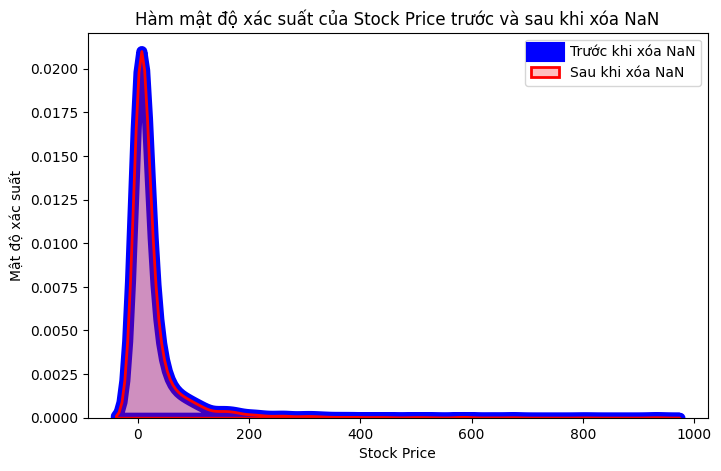

Sau khi xóa các giá trị NaN của cột Stock Price, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change        75
Revenue        445
Volume           4
Sector           4
Net Income     516
FCF             31
Net Cash       451
Rev. Growth     35
dtype: int64



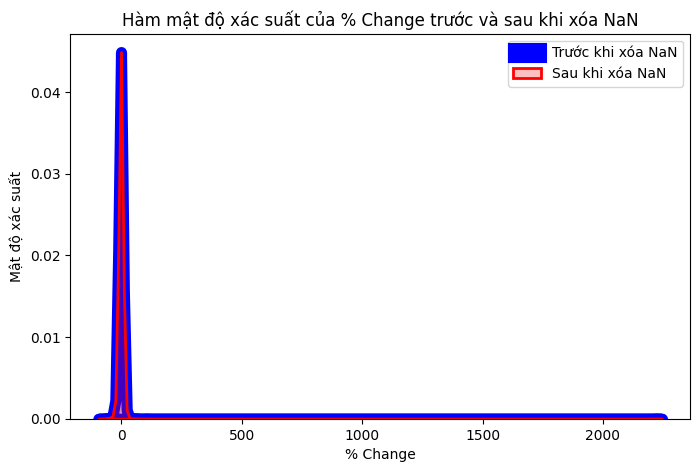

Sau khi xóa các giá trị NaN của cột % Change, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change         0
Revenue        406
Volume           0
Sector           4
Net Income     477
FCF             18
Net Cash       414
Rev. Growth     22
dtype: int64



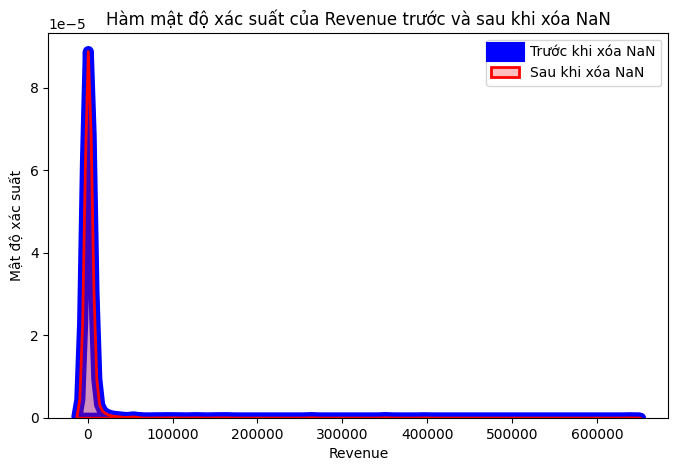

Sau khi xóa các giá trị NaN của cột Revenue, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        36
Revenue          0
Volume           0
Sector           2
Net Income      79
FCF              0
Net Cash       290
Rev. Growth      3
dtype: int64



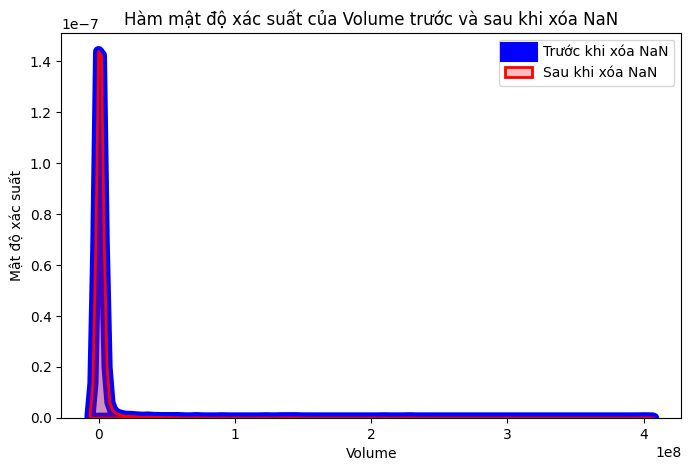

Sau khi xóa các giá trị NaN của cột Volume, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        71
Revenue        441
Volume           0
Sector           4
Net Income     512
FCF             29
Net Cash       447
Rev. Growth     33
dtype: int64



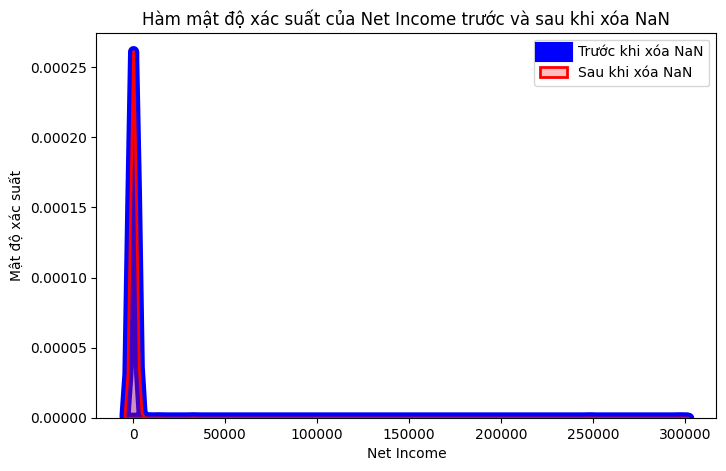

Sau khi xóa các giá trị NaN của cột Net Income, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        36
Revenue          8
Volume           0
Sector           2
Net Income       0
FCF              2
Net Cash       281
Rev. Growth      5
dtype: int64



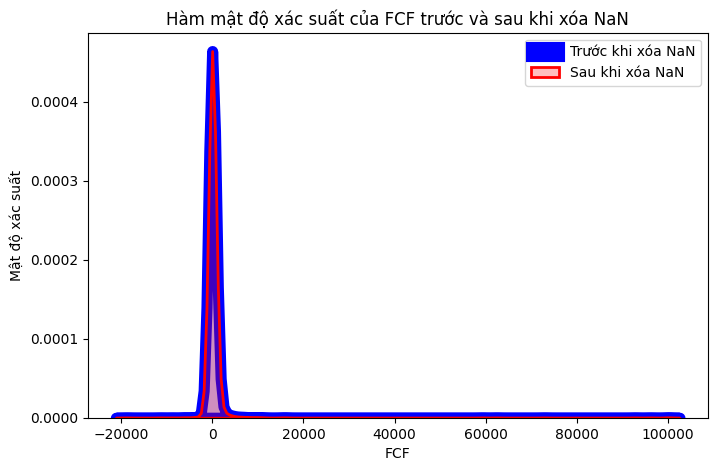

Sau khi xóa các giá trị NaN của cột FCF, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        62
Revenue        414
Volume           2
Sector           4
Net Income     487
FCF              0
Net Cash       423
Rev. Growth      4
dtype: int64



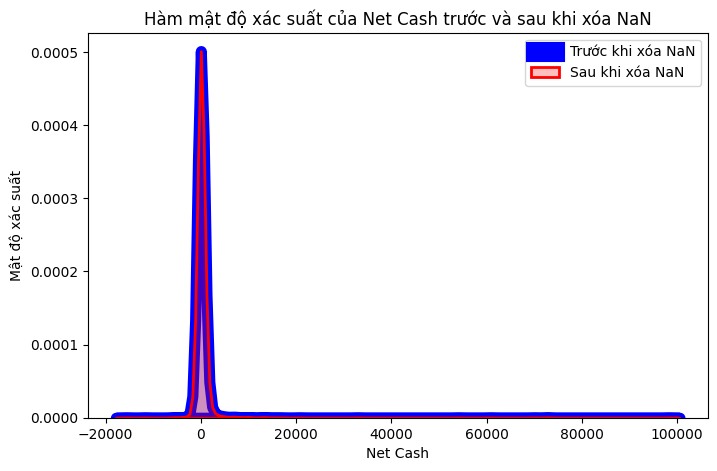

Sau khi xóa các giá trị NaN của cột Net Cash, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        38
Revenue        284
Volume           0
Sector           3
Net Income     346
FCF              3
Net Cash         0
Rev. Growth      3
dtype: int64



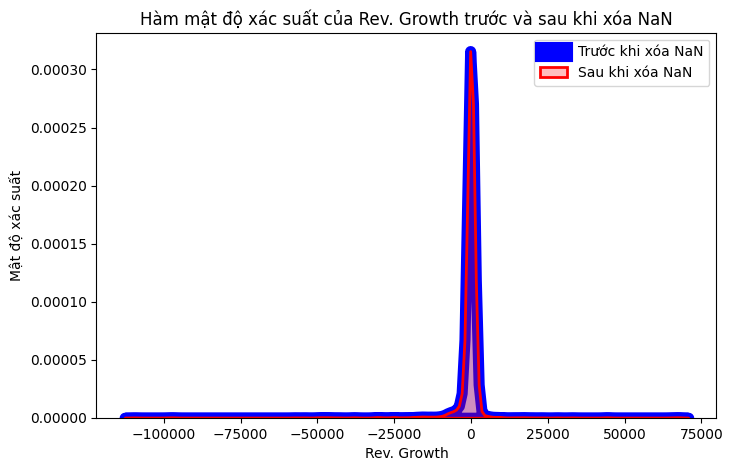

Sau khi xóa các giá trị NaN của cột Rev. Growth, số lượng NaN còn lại:
Market Cap       0
Stock Price      5
% Change        62
Revenue        413
Volume           2
Sector           4
Net Income     486
FCF              0
Net Cash       419
Rev. Growth      0
dtype: int64



In [105]:


# Danh sách các cột có NaN cần kiểm tra
columns_with_nan = ['Stock Price', '% Change', 'Revenue', 'Volume', 
                    'Net Income', 'FCF', 'Net Cash', 'Rev. Growth']

# Duyệt qua từng cột có NaN
for col in columns_with_nan:
    # Sao chép DataFrame gốc để giữ nguyên dữ liệu ban đầu
    df_clean = df.copy()

    df_before = df_clean[col]  # Dữ liệu trước khi xóa NaN

    # Xóa các hàng chứa NaN trong cột hiện tại
    df_clean = df_clean.dropna(subset=[col])  
    df_after = df_clean[col]  # Dữ liệu sau khi xóa NaN

    # Vẽ KDE trước và sau khi xóa trên cùng một đồ thị
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df_before, fill=True, color='blue', linewidth=8, label='Trước khi xóa NaN')
    sns.kdeplot(df_after, fill=True, color='red', linewidth=2, label='Sau khi xóa NaN')

    # Tùy chỉnh đồ thị
    plt.title(f'Hàm mật độ xác suất của {col} trước và sau khi xóa NaN')
    plt.xlabel(col)
    plt.ylabel('Mật độ xác suất')
    plt.legend()
    plt.show()

    # Kiểm tra số lượng NaN sau khi xóa cột hiện tại
    print(f"Sau khi xóa các giá trị NaN của cột {col}, số lượng NaN còn lại:\n{df_clean.isna().sum()}\n")

## Kết luận về ảnh hưởng của việc xóa NaN

Sau khi thực hiện trực quan hóa hàm mật độ xác suất (KDE) trước và sau khi xóa từng cột chứa giá trị NaN, ta nhận thấy rằng **hình dạng của phân phối dữ liệu hầu như không thay đổi**.  

### **Nhận xét chính**:
- **Đường cong KDE( thể hiện mật độ xác suất) trước và sau khi xóa gần như trùng khớp** trên tất cả các cột có NaN.
- Điều này cho thấy việc xóa các hàng có NaN không ảnh hưởng đáng kể đến phân phối dữ liệu.


###  **Hướng xử lý tiếp theo**:
- Do dữ liệu không thay đổi đáng kể sau khi xóa NaN, có thể tiếp tục sử dụng phương pháp này mà không lo mất thông tin quan trọng.


**Tóm lại**, việc xóa các hàng chứa NaN không làm thay đổi phân phối dữ liệu đáng kể, do đó có thể áp dụng mà không ảnh hưởng đến tính đại diện của tập dữ liệu.  

## Áp dụng xóa các giá trị NaN cho dataFrame ban đầu.



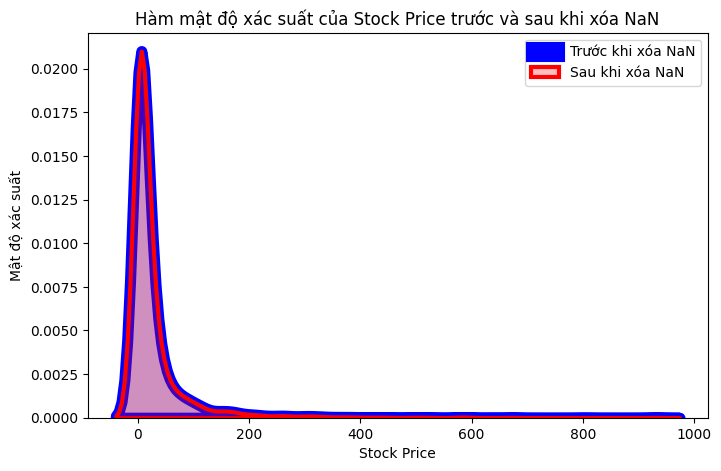

Sau khi xóa các giá trị NaN của cột Stock Price, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change        75
Revenue        445
Volume           4
Sector           4
Net Income     516
FCF             31
Net Cash       451
Rev. Growth     35
dtype: int64



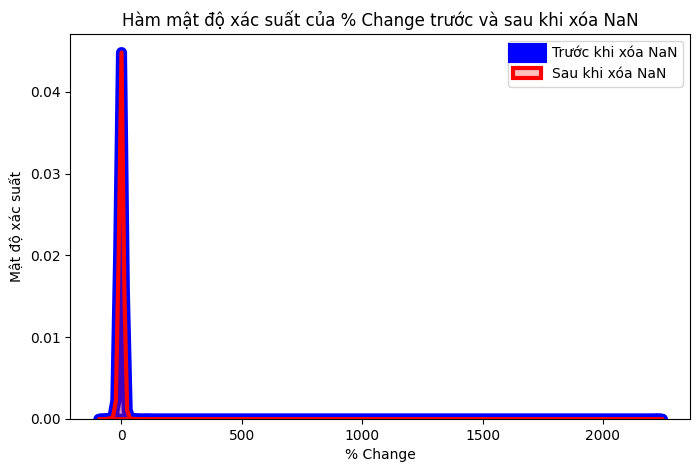

Sau khi xóa các giá trị NaN của cột % Change, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change         0
Revenue        406
Volume           0
Sector           4
Net Income     477
FCF             18
Net Cash       414
Rev. Growth     22
dtype: int64



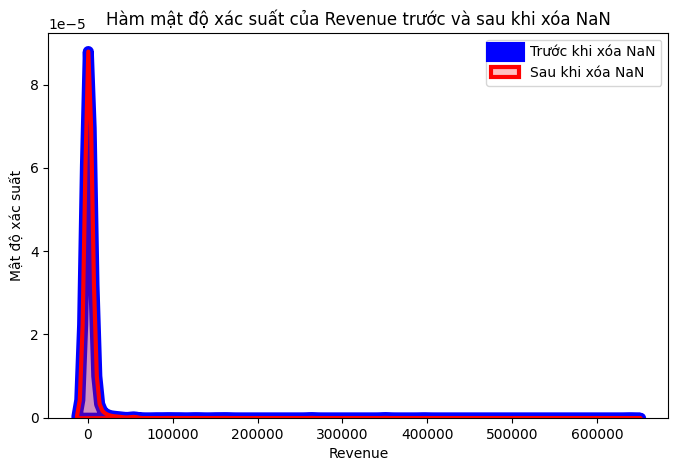

Sau khi xóa các giá trị NaN của cột Revenue, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change         0
Revenue          0
Volume           0
Sector           2
Net Income      79
FCF              0
Net Cash       285
Rev. Growth      3
dtype: int64



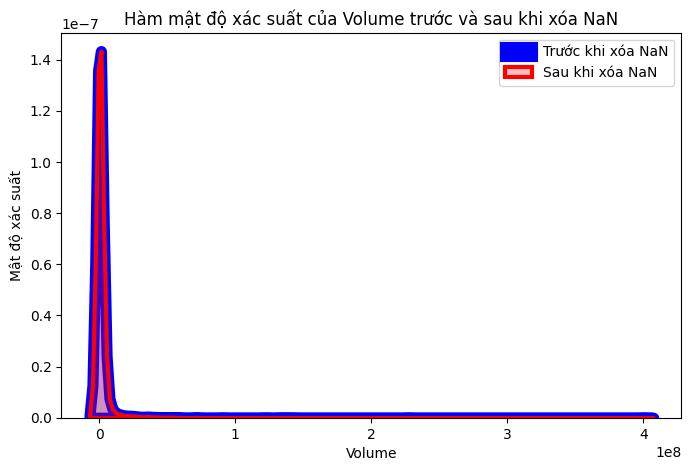

Sau khi xóa các giá trị NaN của cột Volume, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change         0
Revenue          0
Volume           0
Sector           2
Net Income      79
FCF              0
Net Cash       285
Rev. Growth      3
dtype: int64



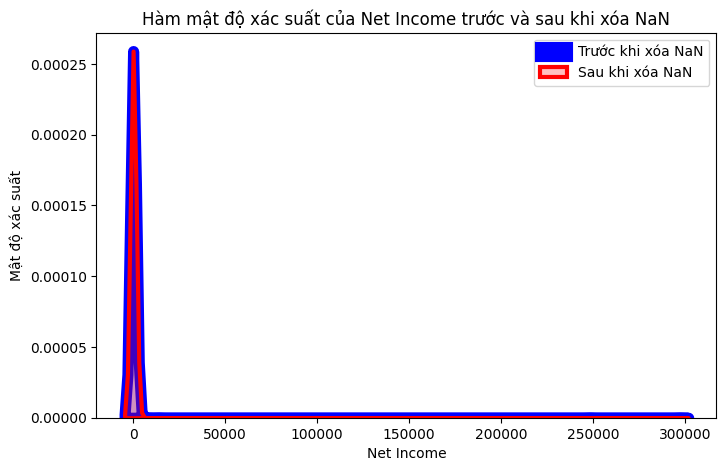

Sau khi xóa các giá trị NaN của cột Net Income, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change         0
Revenue          0
Volume           0
Sector           2
Net Income       0
FCF              0
Net Cash       276
Rev. Growth      3
dtype: int64



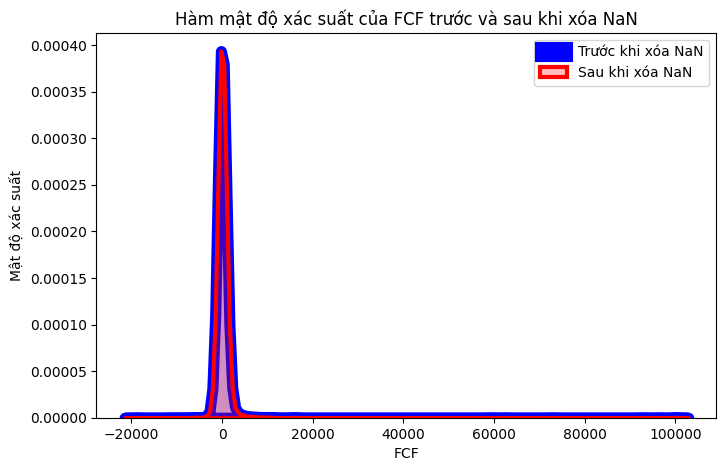

Sau khi xóa các giá trị NaN của cột FCF, số lượng NaN còn lại:
Market Cap       0
Stock Price      0
% Change         0
Revenue          0
Volume           0
Sector           2
Net Income       0
FCF              0
Net Cash       276
Rev. Growth      3
dtype: int64



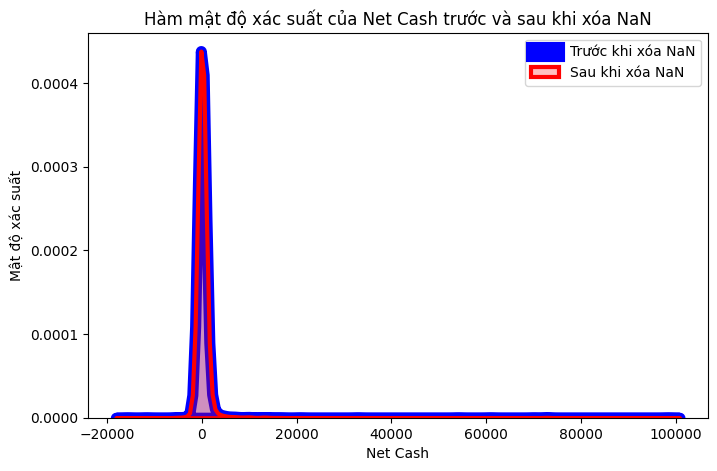

Sau khi xóa các giá trị NaN của cột Net Cash, số lượng NaN còn lại:
Market Cap     0
Stock Price    0
% Change       0
Revenue        0
Volume         0
Sector         2
Net Income     0
FCF            0
Net Cash       0
Rev. Growth    0
dtype: int64



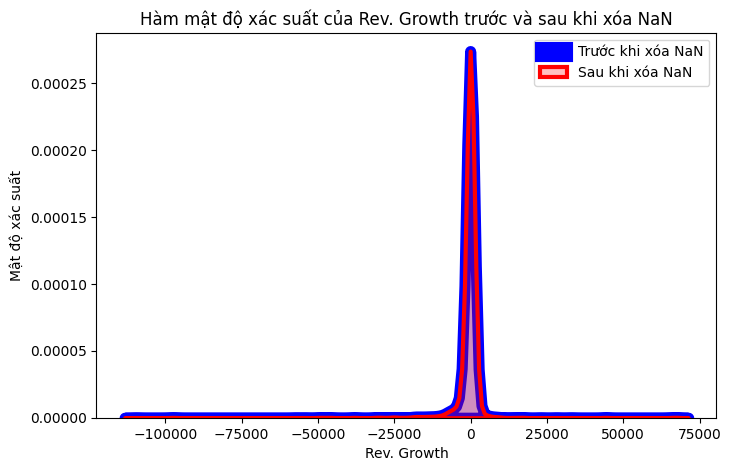

Sau khi xóa các giá trị NaN của cột Rev. Growth, số lượng NaN còn lại:
Market Cap     0
Stock Price    0
% Change       0
Revenue        0
Volume         0
Sector         2
Net Income     0
FCF            0
Net Cash       0
Rev. Growth    0
dtype: int64



In [106]:
# Danh sách các cột có NaN cần kiểm tra
columns_with_nan = ['Stock Price', '% Change', 'Revenue', 'Volume', 
                    'Net Income', 'FCF', 'Net Cash', 'Rev. Growth']

# Duyệt qua từng cột có NaN
for col in columns_with_nan:
    df_before = df[col]  # Dữ liệu trước khi xóa NaN

    # Xóa các hàng chứa NaN trong cột hiện tại (trực tiếp trên df)
    df.dropna(subset=[col], inplace=True)  
    df_after = df[col]  # Dữ liệu sau khi xóa NaN

    # Vẽ KDE trước và sau khi xóa trên cùng một đồ thị
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df_before, fill=True, color='blue', linewidth=8, label='Trước khi xóa NaN')
    sns.kdeplot(df_after, fill=True, color='red', linewidth=3, label='Sau khi xóa NaN')

    # Tùy chỉnh đồ thị
    plt.title(f'Hàm mật độ xác suất của {col} trước và sau khi xóa NaN')
    plt.xlabel(col)
    plt.ylabel('Mật độ xác suất')
    plt.legend()
    plt.show()

    # Kiểm tra số lượng NaN sau khi xóa cột hiện tại
    print(f"Sau khi xóa các giá trị NaN của cột {col}, số lượng NaN còn lại:\n{df.isna().sum()}\n")

Thống kê số giá trị NaN trong các cột

In [107]:
df.isna().sum()

Market Cap     0
Stock Price    0
% Change       0
Revenue        0
Volume         0
Sector         2
Net Income     0
FCF            0
Net Cash       0
Rev. Growth    0
dtype: int64

Xóa các giá trị NaN trong cột Sector

In [108]:
df= df.dropna(subset=["Sector"])
print(df.isna().sum())
df

Market Cap     0
Stock Price    0
% Change       0
Revenue        0
Volume         0
Sector         0
Net Income     0
FCF            0
Net Cash       0
Rev. Growth    0
dtype: int64


,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.9000,-2.66,395760.00,39525987.0,Technology,2.61,96150.00,98300.00,44570.00
1,2.815990e+06,378.8000,-3.02,261800.00,21502861.0,Technology,15.04,92750.00,70030.00,-31350.00
2,2.675950e+06,109.6700,-1.58,130500.00,227835915.0,Technology,114.20,72880.00,60850.00,32940.00
3,2.042390e+06,192.7200,-4.29,637960.00,52146679.0,Consumer Discretionary,10.99,59250.00,32880.00,-54200.00
4,1.890790e+06,156.0600,-4.89,350020.00,34786595.0,Communication Services,13.87,100120.00,72760.00,67520.00
...,...,...,...,...,...,...,...,...,...,...
3303,4.428000e-01,1.4900,-13.87,2.49,742692.0,Consumer Discretionary,840.00,-5.25,-5.32,1.27
3306,4.141400e-01,0.2970,-17.50,11.05,3114923.0,Healthcare,42.66,-30.79,-8.33,-11.77
3307,1.673100e-01,0.0680,-31.31,14.45,6554534.0,Consumer Discretionary,-5.40,-17.19,-6.05,-7.49
3308,1.245700e-01,0.1150,-28.13,4.01,54797083.0,Consumer Discretionary,996.94,-524.46,-161.33,-24.99


Kiểm tra dữ liệu thu được sau khi Data Cleaning

In [109]:
df

,Market Cap,Stock Price,% Change,Revenue,Volume,Sector,Net Income,FCF,Net Cash,Rev. Growth
0,3.273310e+06,217.9000,-2.66,395760.00,39525987.0,Technology,2.61,96150.00,98300.00,44570.00
1,2.815990e+06,378.8000,-3.02,261800.00,21502861.0,Technology,15.04,92750.00,70030.00,-31350.00
2,2.675950e+06,109.6700,-1.58,130500.00,227835915.0,Technology,114.20,72880.00,60850.00,32940.00
3,2.042390e+06,192.7200,-4.29,637960.00,52146679.0,Consumer Discretionary,10.99,59250.00,32880.00,-54200.00
4,1.890790e+06,156.0600,-4.89,350020.00,34786595.0,Communication Services,13.87,100120.00,72760.00,67520.00
...,...,...,...,...,...,...,...,...,...,...
3303,4.428000e-01,1.4900,-13.87,2.49,742692.0,Consumer Discretionary,840.00,-5.25,-5.32,1.27
3306,4.141400e-01,0.2970,-17.50,11.05,3114923.0,Healthcare,42.66,-30.79,-8.33,-11.77
3307,1.673100e-01,0.0680,-31.31,14.45,6554534.0,Consumer Discretionary,-5.40,-17.19,-6.05,-7.49
3308,1.245700e-01,0.1150,-28.13,4.01,54797083.0,Consumer Discretionary,996.94,-524.46,-161.33,-24.99


# Bước 2:  Chuẩn hóa dữ liệu

Kiểm tra thông tin các cột trước khi chuẩn hóa

In [110]:
df.describe()

,Market Cap,Stock Price,% Change,Revenue,Volume,Net Income,FCF,Net Cash,Rev. Growth
count,2.441000e+03,2441.000000,2441.000000,2441.000000,2.441000e+03,2441.000000,2441.000000,2441.000000,2441.000000
mean,1.269751e+04,34.308176,-2.145113,2962.474549,2.015928e+06,264.014908,357.827265,369.519987,-593.392352
std,1.305436e+05,73.839532,45.329030,21212.100931,1.185461e+07,7839.025157,4667.329056,3856.776090,5944.671527
min,5.172000e-02,0.025400,-50.200000,-700.000000,1.000000e+00,-99.920000,-18760.000000,-15660.000000,-109550.000000
25%,5.139000e+01,2.170000,-4.460000,30.770000,5.178500e+04,-7.710000,-39.310000,-16.400000,-199.890000
50%,3.405900e+02,8.790000,-2.450000,198.770000,2.366050e+05,4.330000,-2.710000,0.847000,-2.330000
75%,1.980000e+03,31.120000,-0.940000,963.640000,8.635960e+05,19.180000,42.420000,72.000000,48.560000
max,3.273310e+06,933.850000,2221.840000,637960.000000,4.003108e+08,297063.330000,100120.000000,98300.000000,67520.000000


Bài toán hồi quy- Chuẩn hóa dữ liệu về phân phối chuẩn ( z-score)

In [111]:
# Sao chép DataFrame gốc
df_clean = df.copy()

# Danh sách các cột cần chuẩn hóa
columns_to_normalize = ['Market Cap', 'Stock Price', '% Change', 'Revenue', 'Volume', 
                        'Net Income', 'FCF', 'Net Cash', 'Rev. Growth']




In [112]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Áp dụng Standard scaling cho các cột cần chuẩn hóa
df_clean[columns_to_normalize] = scaler.fit_transform(df_clean[columns_to_normalize])

# Kiểm tra dữ liệu sau khi chuẩn hóa
print(df_clean.describe())

        Market Cap   Stock Price      % Change       Revenue        Volume  \
count  2441.000000  2.441000e+03  2.441000e+03  2.441000e+03  2.441000e+03   
mean      0.000000 -4.657388e-17  1.819292e-18 -3.493041e-17 -5.821735e-18   
std       1.000205  1.000205e+00  1.000205e+00  1.000205e+00  1.000205e+00   
min      -0.097286 -4.643827e-01 -1.060352e+00 -1.726951e-01 -1.700891e-01   
25%      -0.096893 -4.353327e-01 -5.107900e-02 -1.382374e-01 -1.657200e-01   
50%      -0.094677 -3.456604e-01 -6.727473e-03 -1.303157e-01 -1.501262e-01   
75%      -0.082116 -4.318593e-02  2.659134e-02 -9.425017e-02 -9.722533e-02   
max      24.982318  1.218488e+01  4.907321e+01  2.994176e+01  3.360519e+01   

         Net Income           FCF      Net Cash   Rev. Growth  
count  2.441000e+03  2.441000e+03  2.441000e+03  2.441000e+03  
mean  -1.309890e-17  1.164347e-17  2.328694e-17 -1.164347e-17  
std    1.000205e+00  1.000205e+00  1.000205e+00  1.000205e+00  
min   -4.643555e-02 -4.096935e+00 -4.1570

So sánh trực quan dữ liệu sau khi chuẩn hóa
Dùng histogram để trực quan

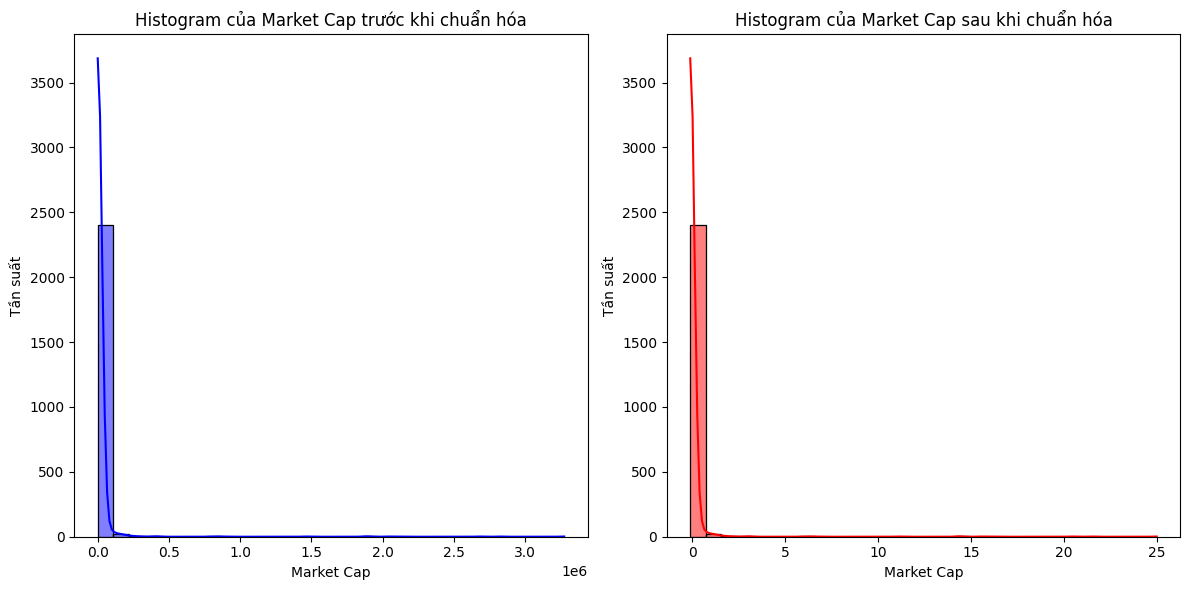

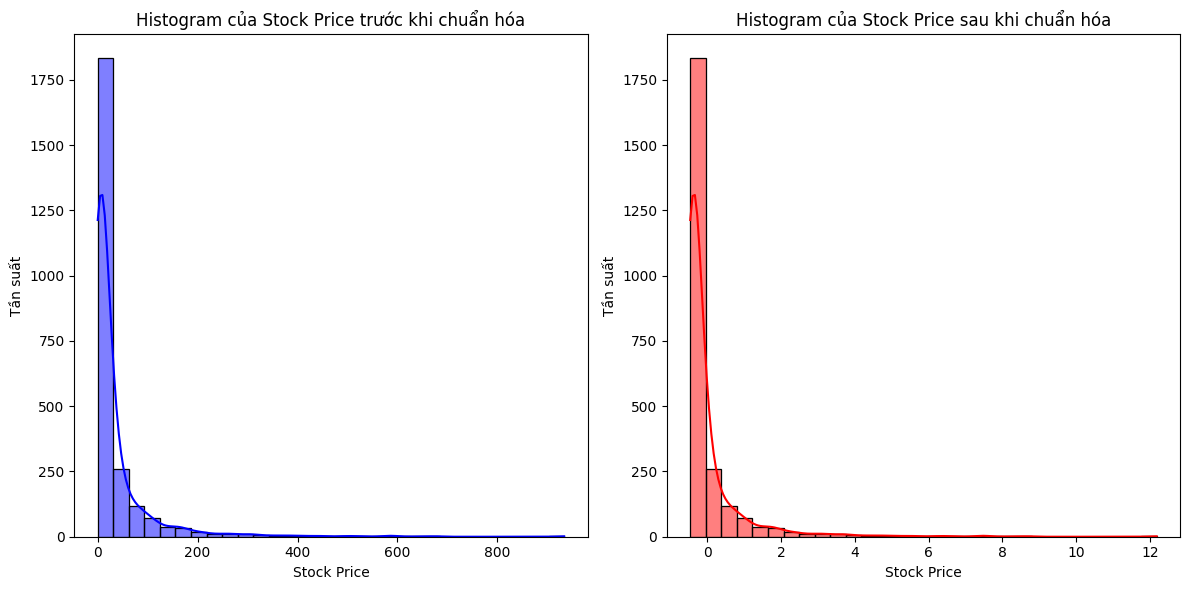

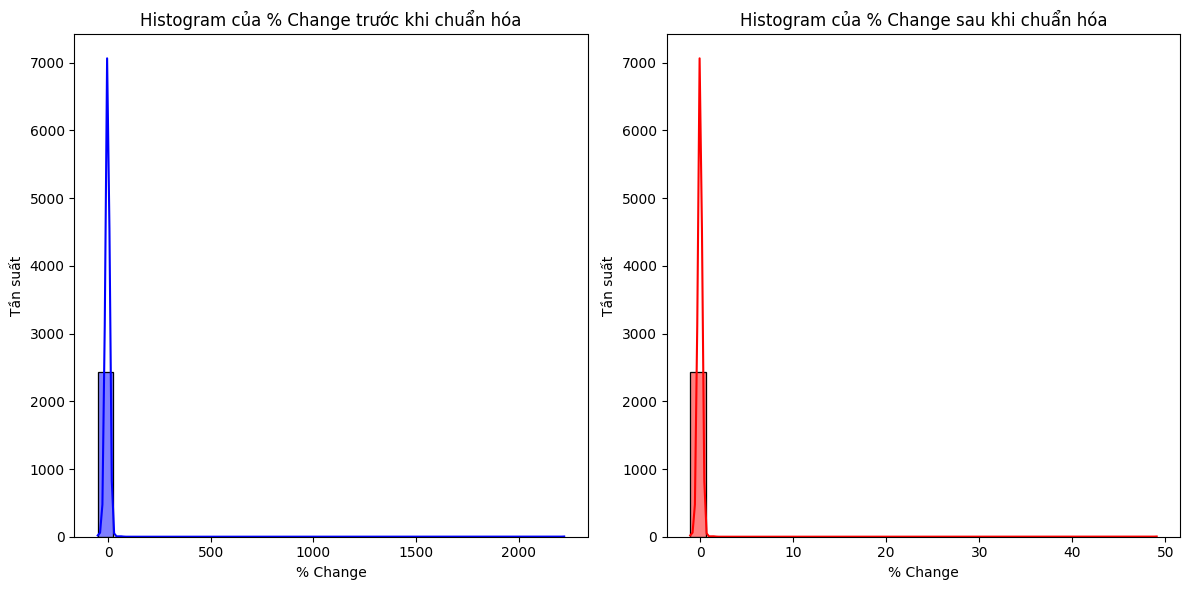

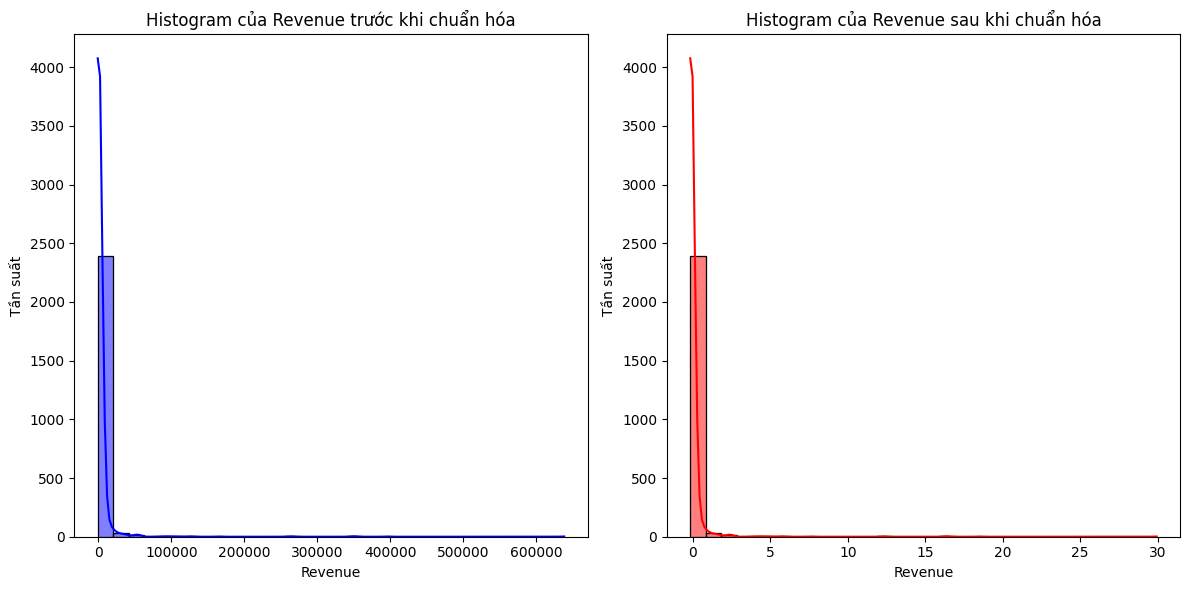

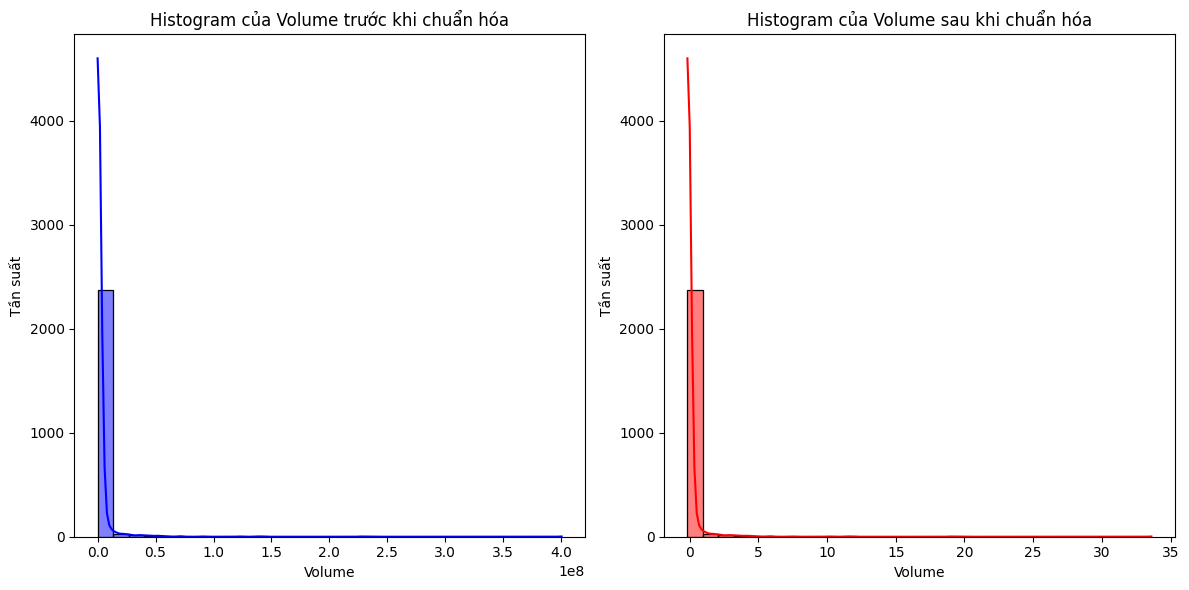

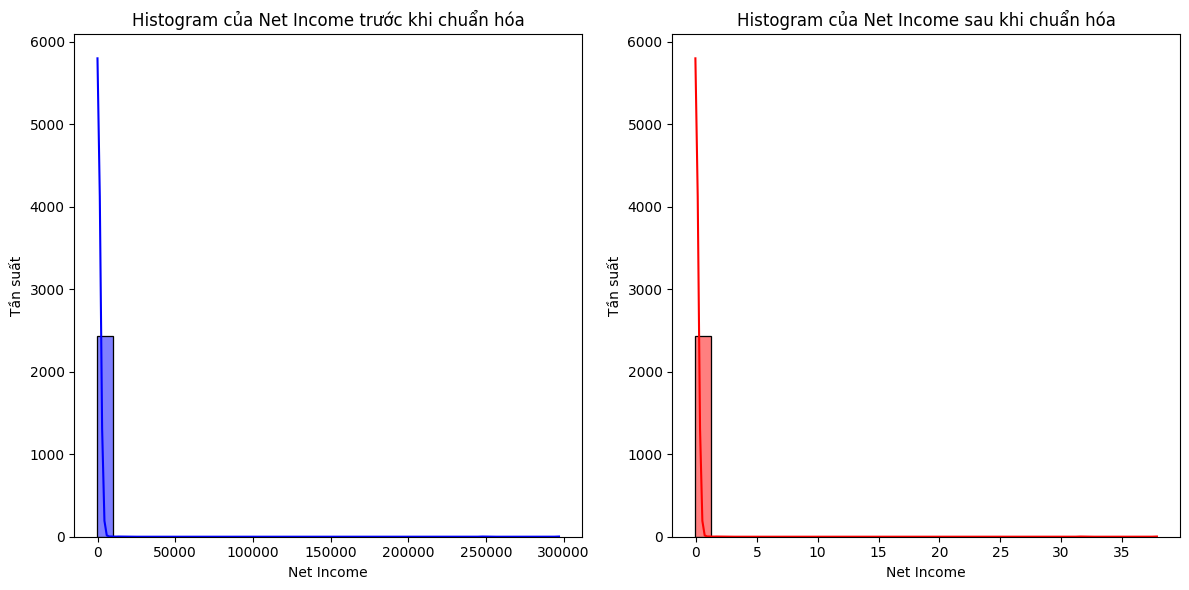

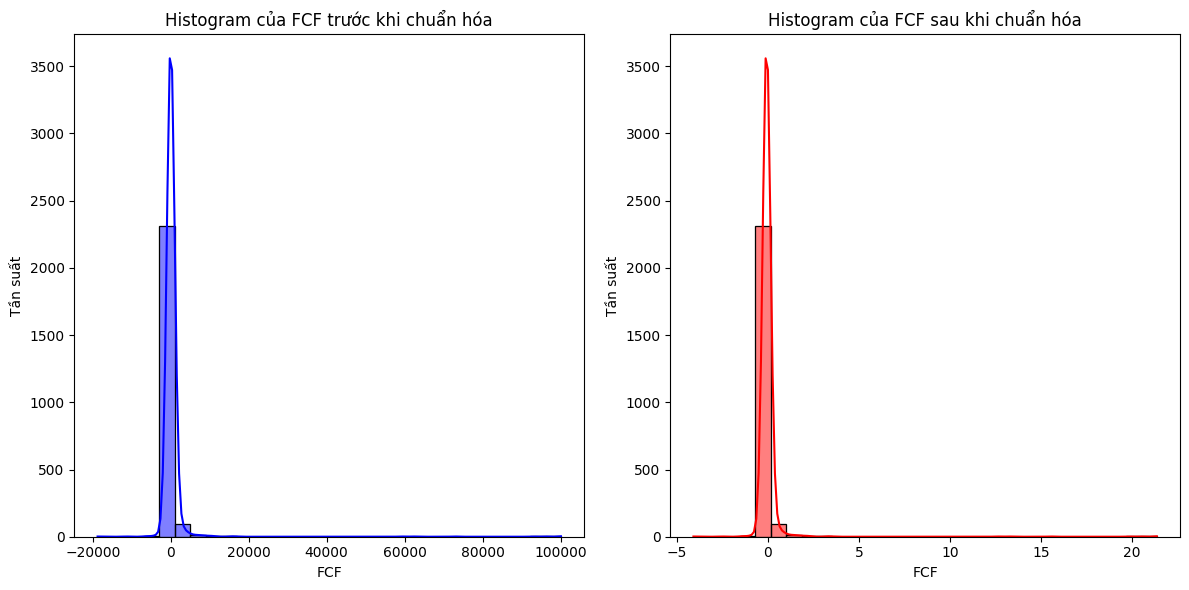

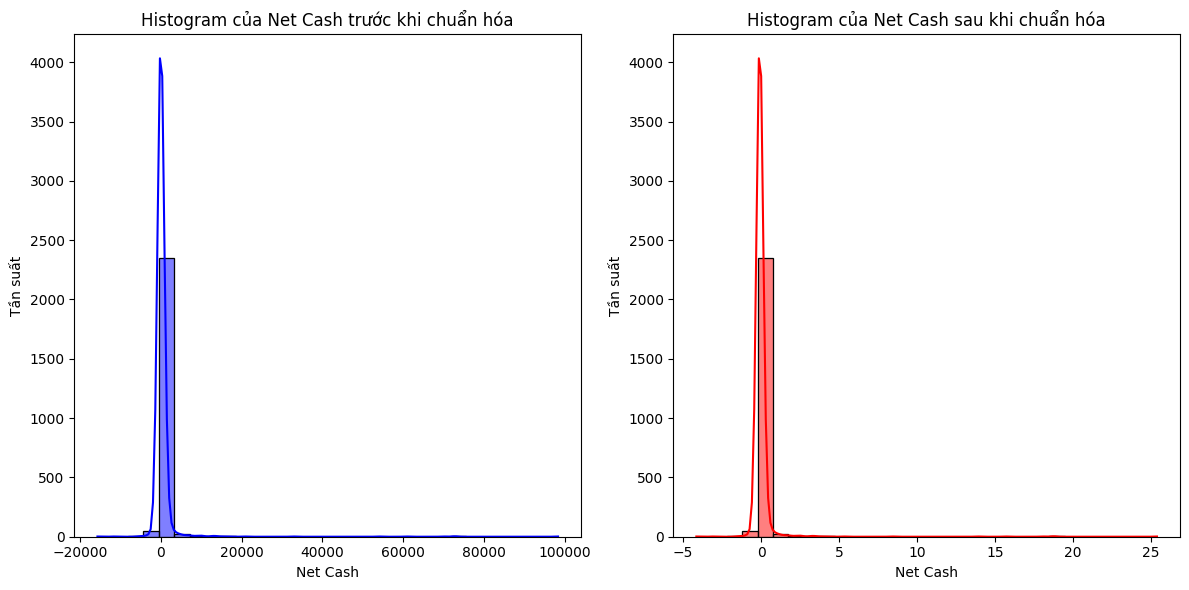

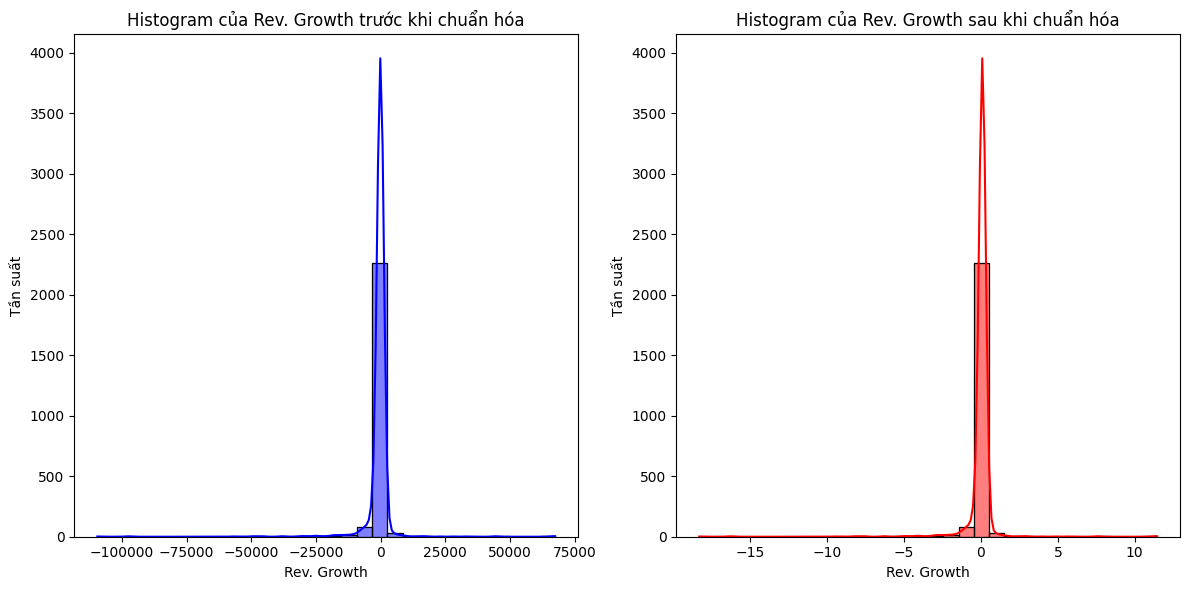

In [113]:
# Chọn các cột cần vẽ histogram
for col in columns_to_normalize:
    plt.figure(figsize=(12, 6))
    
    # Vẽ histogram trước khi chuẩn hóa
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Histogram của {col} trước khi chuẩn hóa")
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    
    # Vẽ histogram sau khi chuẩn hóa
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[col], bins=30, kde=True, color='red')
    plt.title(f"Histogram của {col} sau khi chuẩn hóa")
    plt.xlabel(col)
    plt.ylabel('Tần suất')

    # Hiển thị đồ thị
    plt.tight_layout()
    plt.show()